<a href="https://colab.research.google.com/github/quantaosun/notebook/blob/main/conda-rdkit-smiles-draw_to_PNGs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install conda and rdkit and fragment a molecule**

---



In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-25 04:30:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   112MB/s    in 0.7s    

2021-06-25 04:30:57 (112 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - \ | fail

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

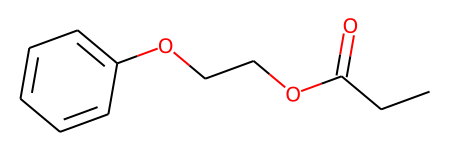

In [11]:
mol = Chem.MolFromSmiles("c1ccccc1OCCOC(=O)CC")
# Default
mol

In [12]:
from rdkit.Chem import Recap
m = Chem.MolFromSmiles('c1ccccc1OCCOC(=O)CC')
hierarch = Recap.RecapDecompose(m)
type(hierarch)

rdkit.Chem.Recap.RecapHierarchyNode

In [13]:
hierarch.smiles

'CCC(=O)OCCOc1ccccc1'

In [14]:
ks=hierarch.children.keys()
sorted(ks)

['*C(=O)CC', '*CCOC(=O)CC', '*CCOc1ccccc1', '*OCCOc1ccccc1', '*c1ccccc1']

In [15]:
ks=hierarch.GetLeaves().keys()
ks=sorted(ks)
ks


['*C(=O)CC', '*CCO*', '*CCOc1ccccc1', '*c1ccccc1']

In [16]:
leaf = hierarch.GetLeaves()[ks[0]]
Chem.MolToSmiles(leaf.mol)

'*C(=O)CC'

分割线，以下为如何一次性从大量smiles 画出png 格式的结构图像

In [24]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [25]:
DrawingOptions.bondLineWidth=1.8
DrawingOptions.atomLabelFontSize=14

In [27]:
smiles_list = ['CCC1CC(CCC1=O)C(=O)C1=CC=CC(C)=C1','CCC1CC(CCC1=O)C(=O)C1=CC=CC=C1',\
         'CC(=C)C(C1=CC=CC=C1)S(=O)CC(N)=O','CC1=CC(=CC=C1)C(C1CCC(N)CC1)C(F)(F)F',\
         'CNC1CCC(C2=CC(Cl)=C(Cl)C=C2)C2=CC=CC=C12','CCCOC(C1CCCCC1)C1=CC=C(Cl)C=C1']

In [28]:
type(smiles_list[0])

str

In [29]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

In [30]:

type(mol_list[0])

rdkit.Chem.rdchem.Mol

In [31]:
mol_list[2].GetNumAtoms()

16

In [39]:
[mol.SetProp('_Name', 'C'+str(mol.GetNumAtoms())) for mol in mol_list];

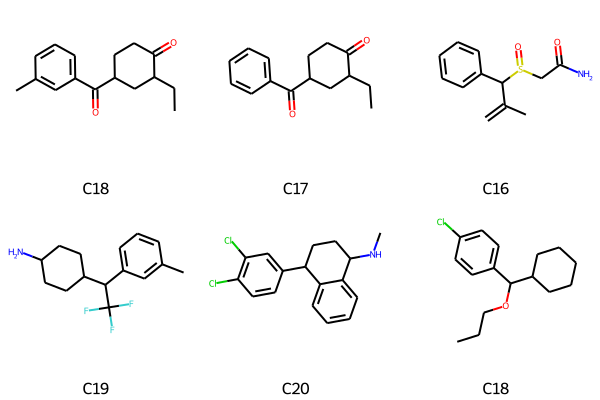

In [40]:
Chem.Draw.MolsToGridImage(mol_list,legends=[mol.GetProp('_Name') for mol in mol_list])